# Learning Rate Decay: Schedules and Strategies

## 🎯 What This Notebook Covers

**Learning Rate Decay** is the technique of reducing the learning rate during training. In this notebook, we explore:

1. ✅ **Why Decay Learning Rate?** - Motivation and intuition
2. ✅ **Decay Schedules** - Step, exponential, cosine, time-based
3. ✅ **Warm-up Strategies** - Starting slow before decaying
4. ✅ **Implementation** - All decay methods from scratch
5. ✅ **Performance Comparison** - Which schedule works best?

### Why This Matters

- **Early Training**: Large learning rate → Fast progress 🚀
- **Late Training**: Small learning rate → Fine-tuning 🎯
- **Result**: Better convergence and final performance! ⭐

Let's master learning rate decay! 🚀

---

## 1. Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import display, Markdown

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

print("✅ Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

✅ Libraries imported successfully!
NumPy version: 2.0.2


## 2. Why Decay Learning Rate?

### The Problem with Fixed Learning Rate

With a **fixed learning rate**:

```
Early Training:
    • Far from minimum
    • Large steps are good (fast progress)
    • ✅ Fixed LR works well

Late Training:
    • Near minimum
    • Large steps overshoot (oscillate)
    • ❌ Fixed LR causes problems
```

### The Solution: Learning Rate Decay

**Idea**: Start with large learning rate, gradually decrease it

$$
\alpha_t = \alpha_0 \cdot \text{decay}(t)
$$

Where:
- $\alpha_0$ = initial learning rate
- $\alpha_t$ = learning rate at epoch $t$
- $\text{decay}(t)$ = decay function

### Benefits

1. **Fast Initial Progress**: Large LR in early epochs
2. **Stable Convergence**: Small LR in late epochs
3. **Better Final Loss**: Fine-tuning near minimum
4. **Escape Plateaus**: Can help escape saddle points

### Analogy

Think of driving to a destination:
- **Highway**: Drive fast (large LR)
- **City streets**: Drive slower (medium LR)
- **Parking**: Drive very slowly (small LR)

---

## 3. Decay Schedules

### 3.1 Step Decay

Reduce learning rate by a factor every few epochs:

$$
\alpha_t = \alpha_0 \cdot \gamma^{\lfloor t / \text{step\_size} \rfloor}
$$

**Parameters**:
- $\gamma$ = decay factor (e.g., 0.5, 0.1)
- $\text{step\_size}$ = epochs between drops

**Example**: $\alpha_0 = 0.1$, $\gamma = 0.5$, step_size = 10
- Epochs 0-9: α = 0.1
- Epochs 10-19: α = 0.05
- Epochs 20-29: α = 0.025

---

### 3.2 Exponential Decay

Smooth exponential decrease:

$$
\alpha_t = \alpha_0 \cdot e^{-\lambda t}
$$

**Parameters**:
- $\lambda$ = decay rate (e.g., 0.01, 0.001)

**Characteristics**:
- Smooth, continuous decay
- Never reaches zero
- Popular in practice

---

### 3.3 Time-Based Decay

Inverse time decay:

$$
\alpha_t = \frac{\alpha_0}{1 + \lambda t}
$$

**Parameters**:
- $\lambda$ = decay rate

**Characteristics**:
- Fast decay initially
- Slower decay later
- Simple and effective

---

### 3.4 Cosine Annealing

Cosine-shaped decay:

$$
\alpha_t = \alpha_{\text{min}} + \frac{1}{2}(\alpha_0 - \alpha_{\text{min}}) \left(1 + \cos\left(\frac{t}{T}\pi\right)\right)
$$

**Parameters**:
- $T$ = total epochs
- $\alpha_{\text{min}}$ = minimum learning rate

**Characteristics**:
- Smooth, gradual decay
- Popular in modern architectures
- Can restart (cosine annealing with restarts)

---

### 3.5 Polynomial Decay

Polynomial decrease:

$$
\alpha_t = \alpha_0 \cdot \left(1 - \frac{t}{T}\right)^p
$$

**Parameters**:
- $p$ = power (typically 0.5 or 1.0)
- $T$ = total epochs

---

## 4. Visualize Decay Schedules

In [2]:
# Define decay functions
def step_decay(epoch, initial_lr=0.1, drop_rate=0.5, epochs_drop=10):
    """Step decay schedule."""
    return initial_lr * (drop_rate ** np.floor(epoch / epochs_drop))

def exponential_decay(epoch, initial_lr=0.1, decay_rate=0.01):
    """Exponential decay schedule."""
    return initial_lr * np.exp(-decay_rate * epoch)

def time_based_decay(epoch, initial_lr=0.1, decay_rate=0.01):
    """Time-based (inverse) decay schedule."""
    return initial_lr / (1 + decay_rate * epoch)

def cosine_annealing(epoch, initial_lr=0.1, min_lr=0.001, total_epochs=100):
    """Cosine annealing schedule."""
    return min_lr + 0.5 * (initial_lr - min_lr) * (1 + np.cos(np.pi * epoch / total_epochs))

def polynomial_decay(epoch, initial_lr=0.1, total_epochs=100, power=1.0):
    """Polynomial decay schedule."""
    return initial_lr * ((1 - epoch / total_epochs) ** power)

print("✅ Decay functions defined!")

✅ Decay functions defined!


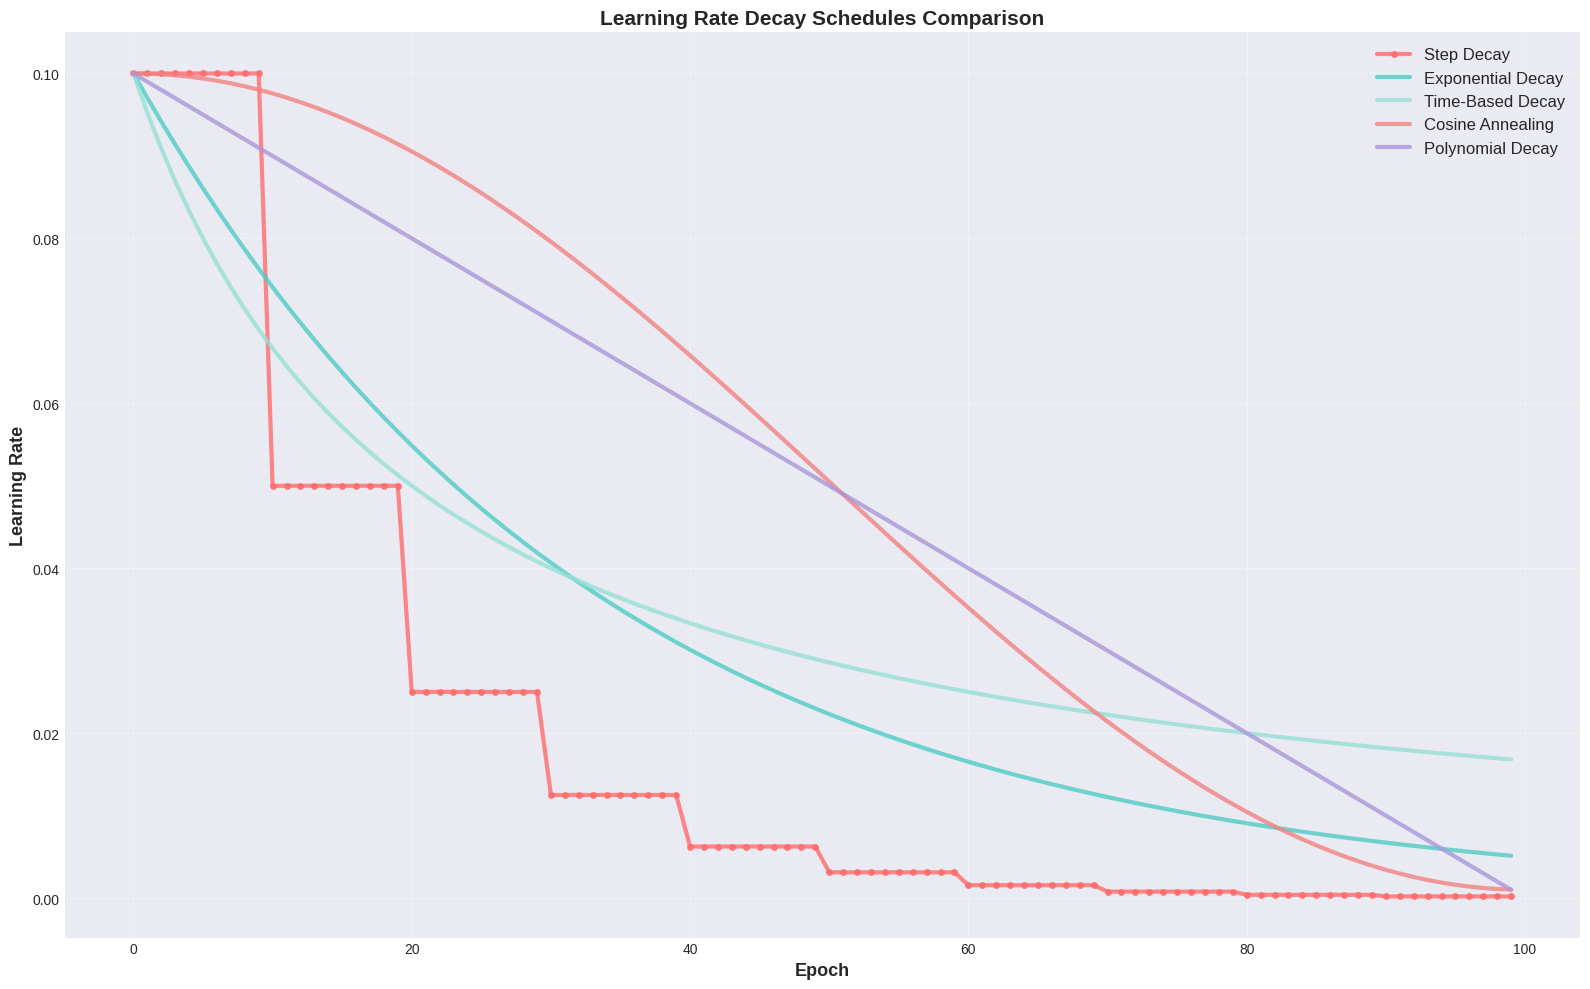


📊 Observations:
  • Step Decay: Sudden drops at fixed intervals
  • Exponential: Smooth, continuous decay
  • Time-Based: Fast initial decay, then slower
  • Cosine: Smooth S-curve shape
  • Polynomial: Linear decay (with power=1)


In [3]:
# Visualize all decay schedules
epochs = np.arange(0, 100)
initial_lr = 0.1

# Compute learning rates for each schedule
lr_step = [step_decay(e, initial_lr) for e in epochs]
lr_exp = [exponential_decay(e, initial_lr, decay_rate=0.03) for e in epochs]
lr_time = [time_based_decay(e, initial_lr, decay_rate=0.05) for e in epochs]
lr_cosine = [cosine_annealing(e, initial_lr, total_epochs=100) for e in epochs]
lr_poly = [polynomial_decay(e, initial_lr, total_epochs=100, power=1.0) for e in epochs]

# Plot
plt.figure(figsize=(16, 10))

plt.plot(epochs, lr_step, linewidth=3, label='Step Decay', marker='o', 
         markersize=4, alpha=0.8, color='#FF6B6B')
plt.plot(epochs, lr_exp, linewidth=3, label='Exponential Decay', 
         alpha=0.8, color='#4ECDC4')
plt.plot(epochs, lr_time, linewidth=3, label='Time-Based Decay', 
         alpha=0.8, color='#95E1D3')
plt.plot(epochs, lr_cosine, linewidth=3, label='Cosine Annealing', 
         alpha=0.8, color='#F38181')
plt.plot(epochs, lr_poly, linewidth=3, label='Polynomial Decay', 
         alpha=0.8, color='#AA96DA')

plt.xlabel('Epoch', fontsize=13, fontweight='bold')
plt.ylabel('Learning Rate', fontsize=13, fontweight='bold')
plt.title('Learning Rate Decay Schedules Comparison', fontsize=15, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Observations:")
print("  • Step Decay: Sudden drops at fixed intervals")
print("  • Exponential: Smooth, continuous decay")
print("  • Time-Based: Fast initial decay, then slower")
print("  • Cosine: Smooth S-curve shape")
print("  • Polynomial: Linear decay (with power=1)")

## 5. Generate Dataset

In [4]:
def generate_spiral_data(n_samples=300, noise=0.1):
    """
    Generate spiral dataset for binary classification.
    
    Returns:
    - X: Features (n_x, m)
    - Y: Labels (1, m)
    """
    np.random.seed(42)
    m = n_samples
    
    # Create spiral
    theta = np.linspace(0, 4*np.pi, m//2)
    r = np.linspace(0.5, 2, m//2)
    
    # Class 0: spiral
    X_class0 = np.vstack([r * np.cos(theta), r * np.sin(theta)])
    Y_class0 = np.zeros((1, m//2))
    
    # Class 1: spiral (rotated)
    X_class1 = np.vstack([r * np.cos(theta + np.pi), r * np.sin(theta + np.pi)])
    Y_class1 = np.ones((1, m//2))
    
    # Combine
    X = np.hstack([X_class0, X_class1])
    Y = np.hstack([Y_class0, Y_class1])
    
    # Add noise
    X += np.random.randn(*X.shape) * noise
    
    # Shuffle
    indices = np.random.permutation(m)
    X = X[:, indices]
    Y = Y[:, indices]
    
    return X, Y

# Generate data
X, Y = generate_spiral_data(n_samples=300, noise=0.1)

print(f"Dataset shape: X={X.shape}, Y={Y.shape}")
print(f"Number of samples: {X.shape[1]}")
print(f"Number of features: {X.shape[0]}")

Dataset shape: X=(2, 300), Y=(1, 300)
Number of samples: 300
Number of features: 2


## 6. Neural Network with Learning Rate Decay

In [5]:
def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

def relu(z):
    """ReLU activation function."""
    return np.maximum(0, z)

def relu_derivative(z):
    """Derivative of ReLU."""
    return (z > 0).astype(float)

print("✅ Activation functions defined!")

✅ Activation functions defined!


In [6]:
class NeuralNetworkWithDecay:
    """
    Neural network with learning rate decay.
    
    Architecture: Input (2) → Hidden (10, ReLU) → Output (1, Sigmoid)
    """
    
    def __init__(self, n_x=2, n_h=10, n_y=1, initial_lr=0.5, 
                 decay_schedule='none', decay_params=None, random_seed=42):
        """
        Initialize neural network with decay schedule.
        
        Parameters:
        - decay_schedule: 'none', 'step', 'exponential', 'time', 'cosine', 'polynomial'
        - decay_params: Dictionary of schedule-specific parameters
        """
        np.random.seed(random_seed)
        
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.initial_lr = initial_lr
        self.current_lr = initial_lr
        self.decay_schedule = decay_schedule
        self.decay_params = decay_params or {}
        
        # Initialize parameters
        self.W1 = np.random.randn(n_h, n_x) * 0.1
        self.b1 = np.zeros((n_h, 1))
        self.W2 = np.random.randn(n_y, n_h) * 0.1
        self.b2 = np.zeros((n_y, 1))
        
        # Training history
        self.losses = []
        self.accuracies = []
        self.learning_rates = []
    
    def update_learning_rate(self, epoch, total_epochs):
        """Update learning rate based on decay schedule."""
        if self.decay_schedule == 'none':
            self.current_lr = self.initial_lr
        
        elif self.decay_schedule == 'step':
            drop_rate = self.decay_params.get('drop_rate', 0.5)
            epochs_drop = self.decay_params.get('epochs_drop', 10)
            self.current_lr = step_decay(epoch, self.initial_lr, drop_rate, epochs_drop)
        
        elif self.decay_schedule == 'exponential':
            decay_rate = self.decay_params.get('decay_rate', 0.01)
            self.current_lr = exponential_decay(epoch, self.initial_lr, decay_rate)
        
        elif self.decay_schedule == 'time':
            decay_rate = self.decay_params.get('decay_rate', 0.01)
            self.current_lr = time_based_decay(epoch, self.initial_lr, decay_rate)
        
        elif self.decay_schedule == 'cosine':
            min_lr = self.decay_params.get('min_lr', 0.001)
            self.current_lr = cosine_annealing(epoch, self.initial_lr, min_lr, total_epochs)
        
        elif self.decay_schedule == 'polynomial':
            power = self.decay_params.get('power', 1.0)
            self.current_lr = polynomial_decay(epoch, self.initial_lr, total_epochs, power)
    
    def forward_propagation(self, X):
        """Forward propagation."""
        Z1 = self.W1 @ X + self.b1
        A1 = relu(Z1)
        Z2 = self.W2 @ A1 + self.b2
        A2 = sigmoid(Z2)
        
        cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
        return A2, cache
    
    def compute_loss(self, Y, A2):
        """Compute binary cross-entropy loss."""
        m = Y.shape[1]
        loss = -np.mean(Y * np.log(A2 + 1e-8) + (1 - Y) * np.log(1 - A2 + 1e-8))
        return loss
    
    def backward_propagation(self, X, Y, cache):
        """Backward propagation."""
        m = X.shape[1]
        Z1, A1, Z2, A2 = cache['Z1'], cache['A1'], cache['Z2'], cache['A2']
        
        # Backprop
        dZ2 = A2 - Y
        dW2 = (1/m) * (dZ2 @ A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
        
        dA1 = self.W2.T @ dZ2
        dZ1 = dA1 * relu_derivative(Z1)
        dW1 = (1/m) * (dZ1 @ X.T)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
        
        return dW1, db1, dW2, db2
    
    def update_parameters(self, dW1, db1, dW2, db2):
        """Update parameters using current learning rate."""
        self.W1 -= self.current_lr * dW1
        self.b1 -= self.current_lr * db1
        self.W2 -= self.current_lr * dW2
        self.b2 -= self.current_lr * db2
    
    def compute_accuracy(self, X, Y):
        """Compute accuracy."""
        A2, _ = self.forward_propagation(X)
        predictions = (A2 > 0.5).astype(int)
        accuracy = np.mean(predictions == Y)
        return accuracy
    
    def fit(self, X, Y, epochs=1000, verbose=False):
        """Train the network with learning rate decay."""
        for epoch in range(epochs):
            # Update learning rate
            self.update_learning_rate(epoch, epochs)
            self.learning_rates.append(self.current_lr)
            
            # Forward propagation
            A2, cache = self.forward_propagation(X)
            
            # Compute loss
            loss = self.compute_loss(Y, A2)
            self.losses.append(loss)
            
            # Compute accuracy
            accuracy = self.compute_accuracy(X, Y)
            self.accuracies.append(accuracy)
            
            # Backward propagation
            dW1, db1, dW2, db2 = self.backward_propagation(X, Y, cache)
            
            # Update parameters
            self.update_parameters(dW1, db1, dW2, db2)
            
            # Print progress
            if verbose and (epoch + 1) % 200 == 0:
                print(f"Epoch {epoch+1:4d}: Loss = {loss:.4f}, "
                      f"Accuracy = {accuracy:.4f}, LR = {self.current_lr:.6f}")
        
        if verbose:
            print(f"\n✅ Training Complete!")
            print(f"   Final Loss: {self.losses[-1]:.4f}")
            print(f"   Final Accuracy: {self.accuracies[-1]:.4f}")
            print(f"   Final LR: {self.current_lr:.6f}")
        
        return self

print("✅ NeuralNetworkWithDecay class defined!")

✅ NeuralNetworkWithDecay class defined!


## 7. Experiment: Compare Decay Schedules

Let's train models with different decay schedules and compare:

In [7]:
# Training parameters
epochs = 1000
initial_lr = 0.5

# Define experiments
experiments = [
    ('No Decay', 'none', {}),
    ('Step Decay', 'step', {'drop_rate': 0.5, 'epochs_drop': 200}),
    ('Exponential', 'exponential', {'decay_rate': 0.003}),
    ('Time-Based', 'time', {'decay_rate': 0.005}),
    ('Cosine', 'cosine', {'min_lr': 0.001}),
    ('Polynomial', 'polynomial', {'power': 1.0})
]

models = []

print("🔬 Training with Different Decay Schedules...\n")

for name, schedule, params in experiments:
    print(f"Training with {name}...")
    model = NeuralNetworkWithDecay(
        initial_lr=initial_lr,
        decay_schedule=schedule,
        decay_params=params,
        random_seed=42
    )
    model.fit(X, Y, epochs=epochs, verbose=False)
    models.append((name, model))

print("\n✅ All experiments complete!")

🔬 Training with Different Decay Schedules...

Training with No Decay...
Training with Step Decay...
Training with Exponential...
Training with Time-Based...
Training with Cosine...
Training with Polynomial...

✅ All experiments complete!


## 8. Visualize Results: Loss Curves

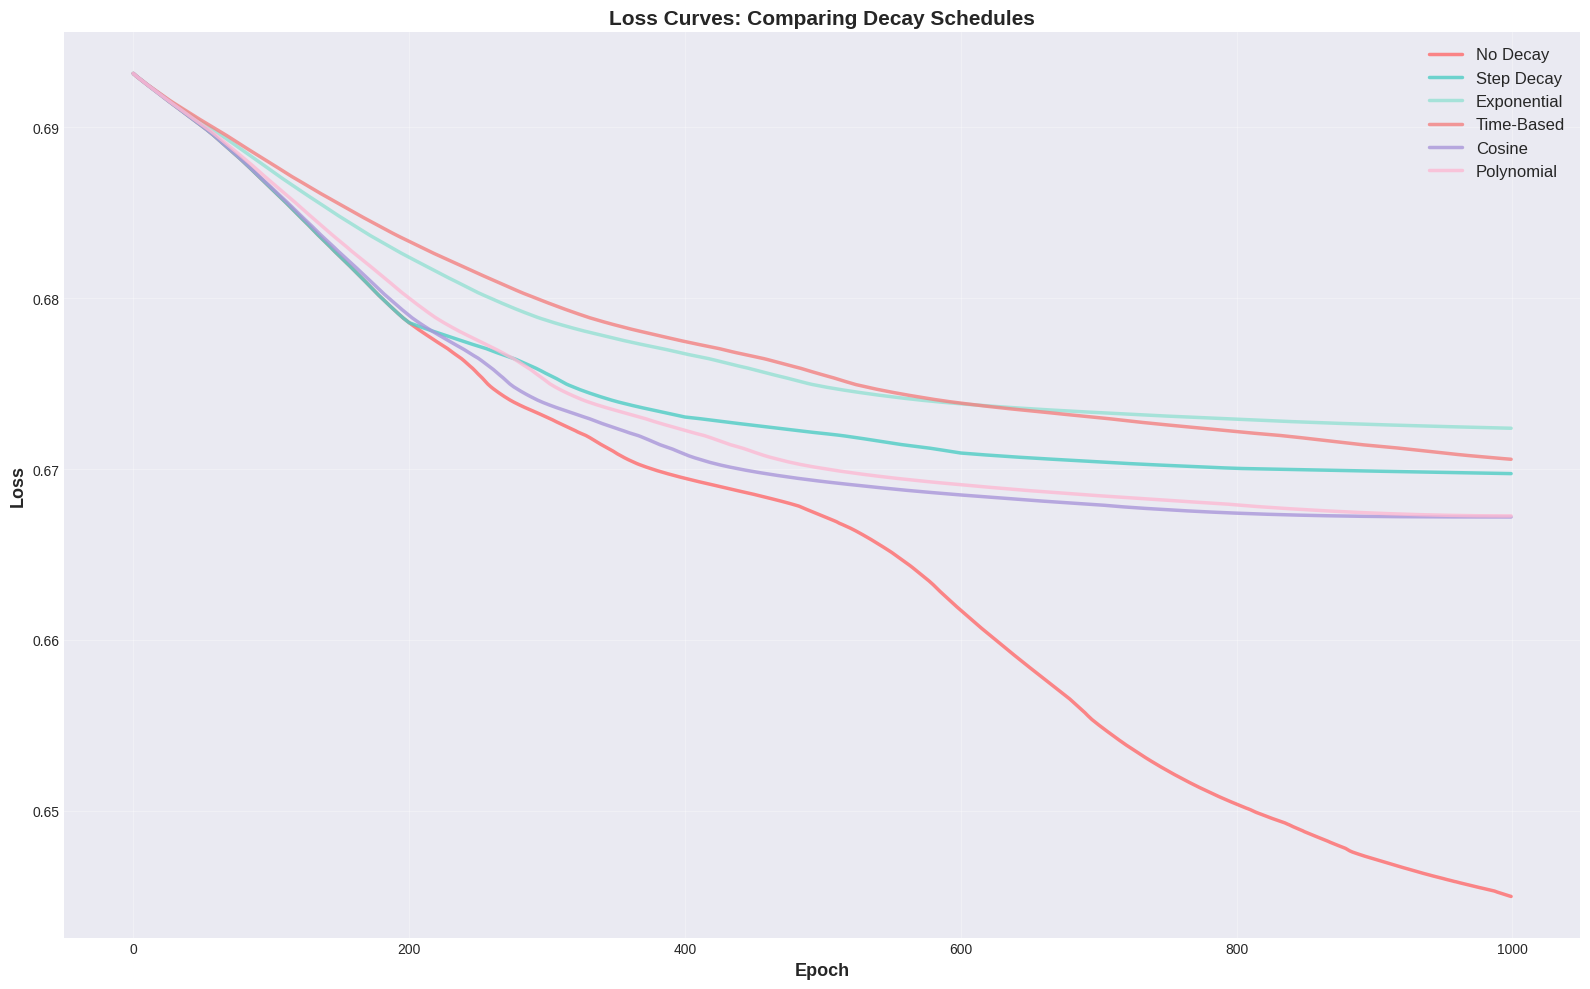


📊 Observations:
  • No Decay: Oscillates near minimum
  • Step Decay: Sudden improvements at drops
  • Exponential: Smooth, steady improvement
  • Time-Based: Similar to exponential
  • Cosine: Smooth convergence
  • Polynomial: Linear decay pattern


In [8]:
# Plot loss curves
plt.figure(figsize=(16, 10))

colors = ['#FF6B6B', '#4ECDC4', '#95E1D3', '#F38181', '#AA96DA', '#FCBAD3']

for (name, model), color in zip(models, colors):
    plt.plot(model.losses, linewidth=2.5, label=name, color=color, alpha=0.8)

plt.xlabel('Epoch', fontsize=13, fontweight='bold')
plt.ylabel('Loss', fontsize=13, fontweight='bold')
plt.title('Loss Curves: Comparing Decay Schedules', fontsize=15, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Observations:")
print("  • No Decay: Oscillates near minimum")
print("  • Step Decay: Sudden improvements at drops")
print("  • Exponential: Smooth, steady improvement")
print("  • Time-Based: Similar to exponential")
print("  • Cosine: Smooth convergence")
print("  • Polynomial: Linear decay pattern")

## 9. Visualize Learning Rate Evolution

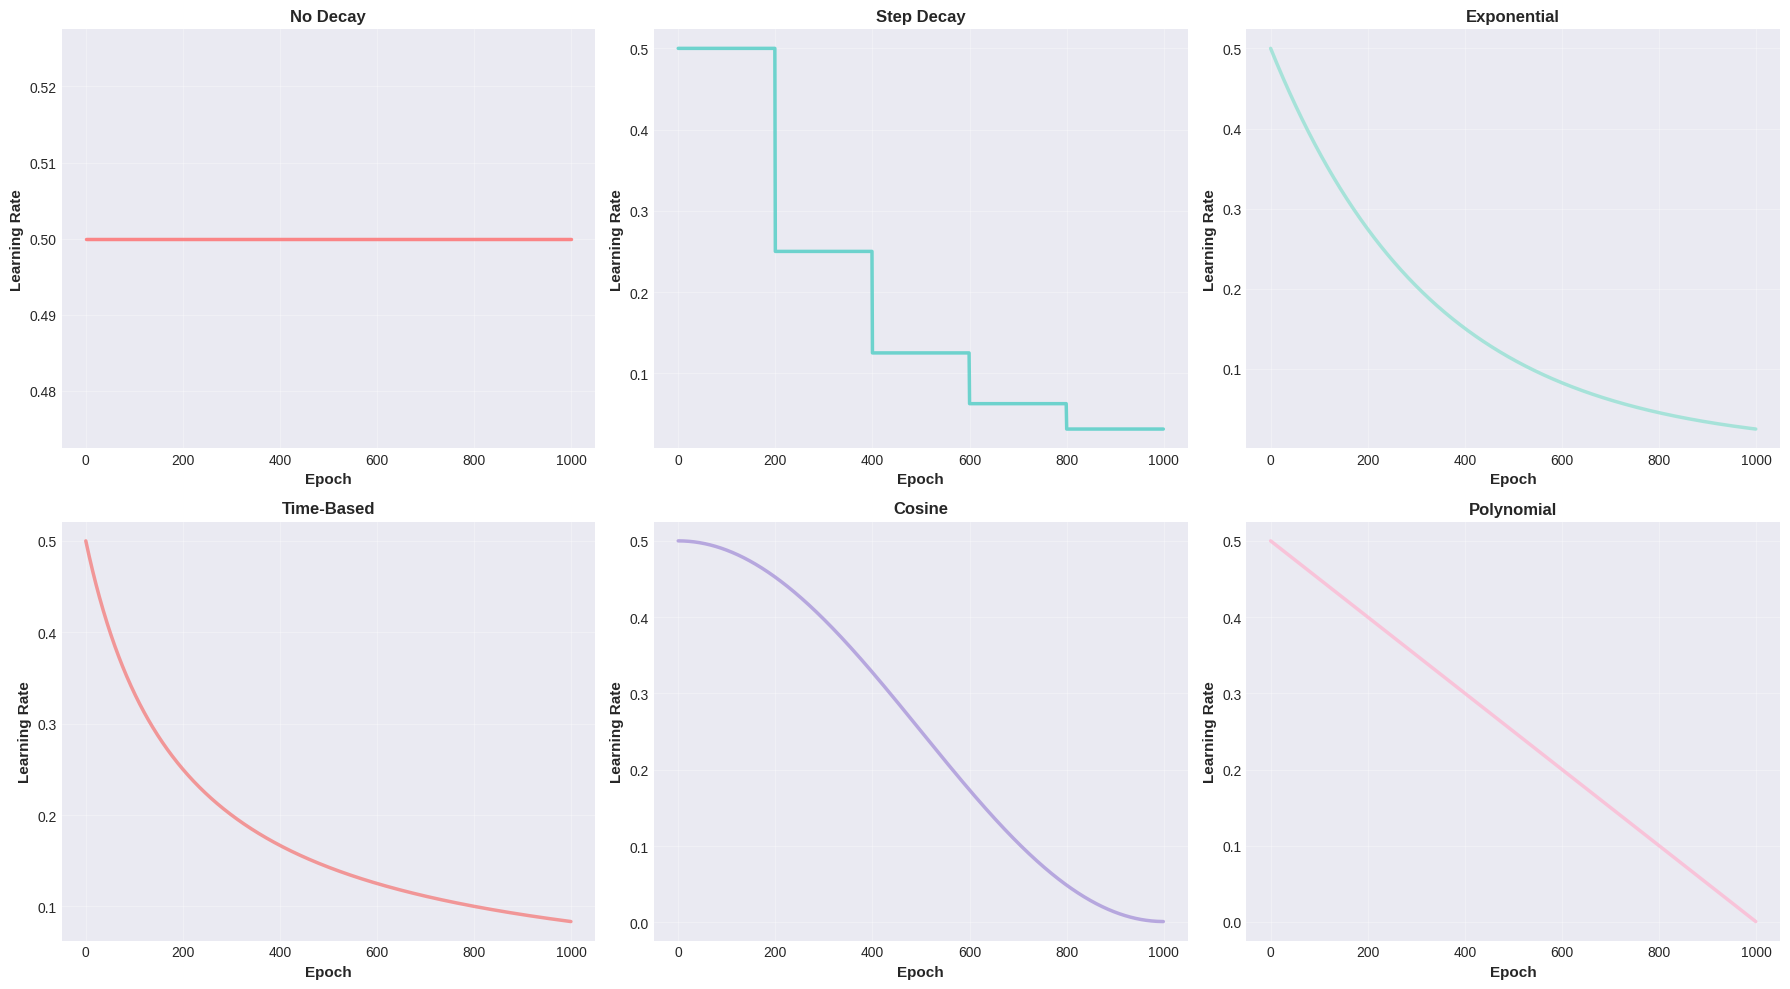


📊 Learning Rate Evolution:
  • Each plot shows how LR changes during training
  • Different schedules have different decay patterns


In [9]:
# Plot learning rate evolution
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (name, model) in enumerate(models):
    ax = axes[idx]
    
    # Plot learning rate
    ax.plot(model.learning_rates, linewidth=2.5, color=colors[idx], alpha=0.8)
    
    ax.set_xlabel('Epoch', fontsize=11, fontweight='bold')
    ax.set_ylabel('Learning Rate', fontsize=11, fontweight='bold')
    ax.set_title(name, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Learning Rate Evolution:")
print("  • Each plot shows how LR changes during training")
print("  • Different schedules have different decay patterns")

## 10. Performance Comparison

In [10]:
# Create comparison table
import pandas as pd

comparison_data = {
    'Schedule': [name for name, _ in models],
    'Final Loss': [f"{model.losses[-1]:.4f}" for _, model in models],
    'Final Accuracy': [f"{model.accuracies[-1]:.4f}" for _, model in models],
    'Initial LR': [f"{model.learning_rates[0]:.4f}" for _, model in models],
    'Final LR': [f"{model.learning_rates[-1]:.6f}" for _, model in models],
    'LR Reduction': [f"{(1 - model.learning_rates[-1]/model.learning_rates[0])*100:.1f}%" 
                     for _, model in models]
}

df = pd.DataFrame(comparison_data)
print("\n📊 Performance Comparison:\n")
print(df.to_string(index=False))

# Find best model
best_idx = np.argmin([model.losses[-1] for _, model in models])
best_name = models[best_idx][0]

print(f"\n\n🏆 Best Schedule: {best_name}")
print(f"   Final Loss: {models[best_idx][1].losses[-1]:.4f}")
print(f"   Final Accuracy: {models[best_idx][1].accuracies[-1]:.4f}")


📊 Performance Comparison:

   Schedule Final Loss Final Accuracy Initial LR Final LR LR Reduction
   No Decay     0.6450         0.5500     0.5000 0.500000         0.0%
 Step Decay     0.6697         0.5967     0.5000 0.031250        93.8%
Exponential     0.6724         0.5900     0.5000 0.024968        95.0%
 Time-Based     0.6706         0.5933     0.5000 0.083403        83.3%
     Cosine     0.6672         0.5900     0.5000 0.001001        99.8%
 Polynomial     0.6673         0.5867     0.5000 0.000500        99.9%


🏆 Best Schedule: No Decay
   Final Loss: 0.6450
   Final Accuracy: 0.5500


## 11. Warm-up Strategy

### What is Warm-up?

**Warm-up** = Start with a very small learning rate, gradually increase it, then apply decay.

```
Epochs 0-10:   Warm-up (LR increases from 0 to initial_lr)
Epochs 10+:    Normal training with decay
```

### Why Use Warm-up?

1. **Unstable Initialization**: Random weights may cause large gradients initially
2. **Large Batch Training**: Helps stabilize training with large batches
3. **Transfer Learning**: Prevents destroying pre-trained weights

### Warm-up Schedule

$$
\alpha_t = \begin{cases}
\alpha_0 \cdot \frac{t}{T_{\text{warmup}}} & \text{if } t < T_{\text{warmup}} \\
\alpha_0 \cdot \text{decay}(t - T_{\text{warmup}}) & \text{otherwise}
\end{cases}
$$

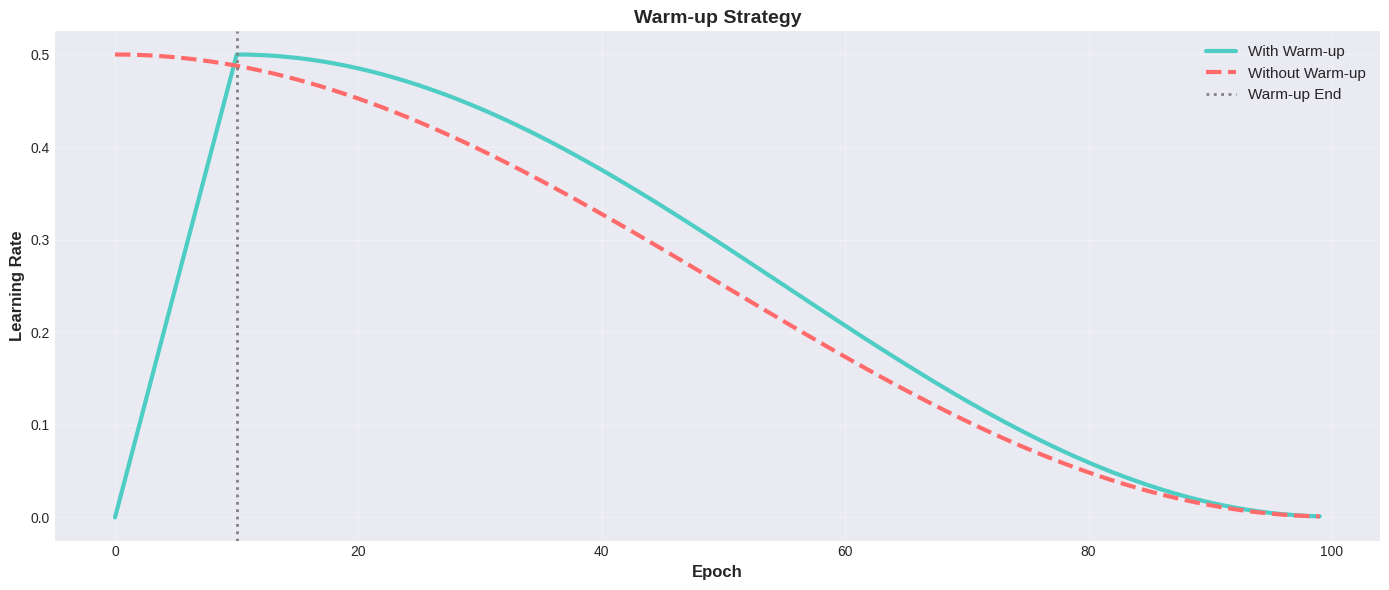


📊 Warm-up Benefits:
  • Gradual start prevents instability
  • Especially useful for large learning rates
  • Common in modern architectures (BERT, GPT, etc.)


In [11]:
def warmup_cosine_schedule(epoch, initial_lr=0.1, warmup_epochs=10, total_epochs=100, min_lr=0.001):
    """
    Warm-up followed by cosine annealing.
    """
    if epoch < warmup_epochs:
        # Linear warm-up
        return initial_lr * (epoch / warmup_epochs)
    else:
        # Cosine annealing
        progress = (epoch - warmup_epochs) / (total_epochs - warmup_epochs)
        return min_lr + 0.5 * (initial_lr - min_lr) * (1 + np.cos(np.pi * progress))

# Visualize warm-up schedule
epochs_range = np.arange(0, 100)
lr_warmup = [warmup_cosine_schedule(e, initial_lr=0.5, warmup_epochs=10, total_epochs=100) 
             for e in epochs_range]
lr_no_warmup = [cosine_annealing(e, initial_lr=0.5, total_epochs=100) for e in epochs_range]

plt.figure(figsize=(14, 6))
plt.plot(epochs_range, lr_warmup, linewidth=3, label='With Warm-up', color='#4ECDC4')
plt.plot(epochs_range, lr_no_warmup, linewidth=3, label='Without Warm-up', 
         color='#FF6B6B', linestyle='--')
plt.axvline(10, color='gray', linestyle=':', linewidth=2, label='Warm-up End')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Learning Rate', fontsize=12, fontweight='bold')
plt.title('Warm-up Strategy', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Warm-up Benefits:")
print("  • Gradual start prevents instability")
print("  • Especially useful for large learning rates")
print("  • Common in modern architectures (BERT, GPT, etc.)")

## 12. Practical Guidelines

### 🎯 Which Schedule to Use?

#### For Most Cases:
- **Cosine Annealing**: Smooth, works well in practice
- **Exponential Decay**: Simple and effective

#### For Specific Scenarios:
- **Step Decay**: When you know good checkpoint epochs
- **Time-Based**: Fast initial decay needed
- **Polynomial**: Linear decay (power=1)

#### With Warm-up:
- **Large Batch Training**: Always use warm-up
- **Transfer Learning**: Warm-up prevents destroying pre-trained weights
- **Unstable Training**: Warm-up helps stabilize

---

### 📋 Hyperparameter Selection

**Step Decay:**
- drop_rate: 0.1 to 0.5
- epochs_drop: 10 to 50

**Exponential Decay:**
- decay_rate: 0.001 to 0.01

**Cosine Annealing:**
- min_lr: 0.001 to 0.0001
- total_epochs: known in advance

**Warm-up:**
- warmup_epochs: 5 to 20 (typically 5-10% of total)

---

### ⚠️ Common Mistakes

1. **Decaying Too Fast**: LR becomes too small too quickly
2. **Not Decaying**: Missing potential improvements
3. **Wrong Schedule**: Step decay with wrong drop points
4. **No Warm-up**: When using large initial LR
5. **Forgetting min_lr**: LR shouldn't go to zero

---

### 💡 Pro Tips

1. **Monitor Loss**: If loss plateaus, consider manual LR reduction
2. **Validation-Based**: Reduce LR when validation loss plateaus
3. **Cosine with Restarts**: Periodically reset LR (advanced)
4. **Layer-wise Decay**: Different decay for different layers
5. **Combine Strategies**: Warm-up + Cosine is very popular

---

## 13. Summary and Key Takeaways

### What We Learned

✅ **Why Decay Learning Rate**
- Fast progress early (large LR)
- Fine-tuning late (small LR)
- Better final performance

✅ **Decay Schedules**
- Step Decay: Sudden drops
- Exponential: Smooth decay
- Time-Based: Fast initial decay
- Cosine: S-curve (popular!)
- Polynomial: Flexible power

✅ **Warm-up Strategy**
- Start small, increase gradually
- Prevents instability
- Essential for large batches

✅ **Practical Guidelines**
- Cosine annealing is most popular
- Use warm-up for large LR
- Monitor and adjust as needed

### Connection to Other Notebooks

This notebook builds on:
- **`7_1_stochastic_gradient_descent_sgd.ipynb`**: Gradient descent basics
- **`7_2_learning_rate_impact_and_optimization.ipynb`**: Learning rate fundamentals

### Next Steps

🚀 **Coming Next:**
- **7.4 SGD with Momentum**: Accelerated convergence
- **7.5 AdaGrad**: Adaptive learning rates per parameter
- **7.6 RMSProp**: Fixes AdaGrad's issues
- **7.7 Adam**: Combines momentum and RMSProp

---

**🎓 Congratulations!** You now understand learning rate decay and can apply it effectively!

**Key Insight:** Learning rate decay is like shifting gears in a car - start fast, slow down as you approach your destination!